**Note: Please use google collab or instead of cv2_imshow use cv2.imshow.**

Here https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html you can find implementation of all basic morphological operations.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import imageio as iio
import cv2

from numpy import pi
from numpy import r_
from skimage import measure
from scipy.stats import norm
from os import listdir
from os.path import isfile, join
from skimage.morphology import (square, rectangle, diamond, disk, cube, octahedron, ball, octagon, star)

**1. Application of opening, closing.**

Convert to grayscale.

In [6]:
img = cv2.imread('calligraphy.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2.imshow(mat=gray,winname='gray')

Convert to binary.

In [7]:
ret, bw_img = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
cv2.cv2.imshow(winname='gray',mat=bw_img)

Structuring element.

In [8]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
# or you can use structuring elemnt from skimage
#kernel = disk(7)

Apply opening.

In [9]:
opening = cv2.morphologyEx(bw_img, cv2.MORPH_OPEN, kernel)
cv2.cv2.imshow(winname='gray',mat=opening)

Apply closing.

In [10]:
closing = cv2.morphologyEx(bw_img, cv2.MORPH_CLOSE, kernel)
cv2.cv2.imshow(winname='gray',mat=closing)

**2. Boundary extraction.**

Convert to grayscale.

In [11]:
img2 = cv2.imread('skel.jpg')
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
cv2.cv2.imshow(winname='gray',mat=gray2)

Convert to binary.

In [12]:
ret2, bw_img2 = cv2.threshold(gray2, 127, 255, cv2.THRESH_BINARY)
cv2.cv2.imshow(winname='gray',mat=bw_img2)

Structuring element.

In [13]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
# or you can use structuring elemnt from skimage
#kernel = disk(5)

Apply erosion.

In [14]:
erosion = cv2.erode(bw_img2,kernel2,iterations = 1)
cv2.cv2.imshow(winname='gray',mat=erosion)

Boundary.

In [15]:
final = cv2.subtract(bw_img2,erosion)
cv2.cv2.imshow(winname='gray',mat=final)

# 3. Skeleton.

Convert to grayscale.

In [16]:
img3 = cv2.imread('tools.jpg')
gray3 = cv2.cvtColor(img3, cv2.COLOR_RGB2GRAY)
cv2.cv2.imshow(winname='gray',mat=gray3)

Convert to binary.

In [17]:
ret3, bw_img3 = cv2.threshold(gray3, 127, 255, cv2.THRESH_BINARY)
cv2.cv2.imshow(winname='gray',mat=bw_img3)

Skeleton.

In [18]:
# Step 1: Create an empty skeleton
size = np.size(bw_img3)
skel = np.zeros(bw_img3.shape, np.uint8)

# Get a Cross Shaped Kernel
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

# Repeat steps 2-4
while True:
    #Step 2: Open the image
    open = cv2.morphologyEx(bw_img3, cv2.MORPH_OPEN,element)
    #Step 3: Substract open from the original image
    temp = cv2.subtract(bw_img3, open)
    #Step 4: Erode the original image and refine the skeleton
    eroded = cv2.erode(bw_img3, element)
    skel = cv2.bitwise_or(skel,temp)
    bw_img3 = eroded.copy()
    # Step 5: If there are no white pixels left ie.. the image has been completely eroded, quit the loop
    if cv2.countNonZero(bw_img3)==0:
        break

# Displaying the final skeleton
cv2.cv2.imshow(winname='gray',mat=skel)

**4. Hit and Miss transform.**


Basic example.

In [19]:
# Create the input image
input_image = np.array((
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 0, 0, 255],
    [0, 0, 255, 255, 0, 0, 0, 0],
    [0, 0, 255, 255, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 0, 0, 255, 255, 255],
    [0,255, 0, 0, 0, 0, 255, 0],
    [0, 255, 0, 0, 0, 0, 255, 0]), dtype="uint8")

# Construct the structuring element
kernel = np.array((
        [1, 1, 1],
        [0, 1, -1],
        [0, 1, -1]), dtype="int")

# Apply hit-or-miss transformation
rate = 50
output_image = cv2.morphologyEx(input_image, cv2.MORPH_HITMISS, kernel)
output_image = cv2.resize(output_image, None , fx = rate, fy = rate, interpolation = cv2.INTER_NEAREST)
cv2.cv2.imshow(winname='gray',mat=output_image)

Loading mat files and applying hit or miss.

In [20]:
import scipy.io
data = scipy.io.loadmat('amanita.mat')
b = (data["b"])
#print(b)


In [21]:
data2 = scipy.io.loadmat('amanitastamp.mat')
y = (data2["y"])
#print(y)

In [22]:
rate = 50
rez = cv2.morphologyEx(y, cv2.MORPH_HITMISS, b)
#rez = cv2.resize(output_image, None , fx = rate, fy = rate, interpolation = cv2.INTER_NEAREST)
#cv2_imshow(rez)


**5.  Granulometry.**

In [23]:
#Convert to grayscale.
img5 = cv2.imread('snowflake.jpg')
gray5 = cv2.cvtColor(img5, cv2.COLOR_RGB2GRAY)
#Convert to binary.
ret5, bw_img5 = cv2.threshold(gray5, 127, 255, cv2.THRESH_BINARY)
cv2.cv2.imshow(winname='gray',mat=bw_img5)


Simple granulometry analysis.

If you need a more complex and detailed example, you can find it here:
https://medium.com/@sunil7545/how-to-automate-electron-microscopic-image-analysis-70355f1099a5

C:\Users\Lorenzo\AppData\Local\Temp/ipykernel_25928/4023771301.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
C:\Users\Lorenzo\AppData\Local\Temp/ipykernel_25928/4023771301.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: 

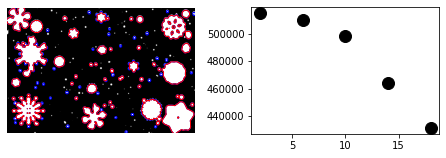

In [24]:
from scipy import ndimage

def disk_structure(n):
    struct = np.zeros((2 * n + 1, 2 * n + 1))
    x, y = np.indices((2 * n + 1, 2 * n + 1))
    mask = (x - n)**2 + (y - n)**2 <= n**2
    struct[mask] = 1
    return struct.astype(np.bool)


def granulometry(data, sizes=None):
    s = max(data.shape)
    if sizes.all == None:
        sizes = range(1, s/2, 2)
    granulo = [ndimage.binary_opening(data, structure=disk_structure(n)).sum() for n in sizes]
    return granulo


np.random.seed(1)
n = 10
l = 256
im = bw_img5
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))

mask = im > im.mean()

granulo = granulometry(mask, sizes=np.arange(2, 19, 4))

plt.figure(figsize=(6, 2.2))

plt.subplot(121)
plt.imshow(mask, cmap=plt.cm.gray)
opened = ndimage.binary_opening(mask, structure=disk_structure(10))
opened_more = ndimage.binary_opening(mask, structure=disk_structure(14))
plt.contour(opened, [0.5], colors='b', linewidths=1)
plt.contour(opened_more, [0.5], colors='r', linewidths=1)
plt.axis('off')
plt.subplot(122)
plt.plot(np.arange(2, 19, 4), granulo, 'ok', ms=12)


plt.subplots_adjust(wspace=0.3, hspace=0.25, top=0.95, bottom=0.15, left=15, right=16)
plt.show()

**6. Region filling - Swiss cheese example!**

In [25]:
# Read image
img6 = cv2.imread('swisscheese.jpg')
gray6 = cv2.cvtColor(img6, cv2.COLOR_RGB2GRAY)
#cv2_imshow(gray6)
ret, bw_img6 = cv2.threshold(gray6, 127, 255, cv2.THRESH_BINARY)
cv2.cv2.imshow(winname='gray',mat=bw_img6)
print(bw_img6[280,650])


0


Filling one hole.

In [26]:
y=np.zeros(bw_img6.shape, np.uint8)
y[280,650] = 255
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
img_dilation = cv2.dilate(y, kernel, iterations=70)
rez = img_dilation + bw_img6
cv2.cv2.imshow(winname='gray',mat=rez)



In case if you want to fill all holes, you can use the following method.

In [27]:
from skimage.morphology import reconstruction

seed = np.copy(bw_img6)
seed[1:-1, 1:-1] = bw_img6.max()
mask = bw_img6

filled = reconstruction(seed, mask, method='erosion')
cv2.cv2.imshow(winname='gray',mat=filled)